<a href="https://colab.research.google.com/github/berrygayo/NLP-Natural-Language-Processing-/blob/master/%ED%8F%AC%EC%BC%93%EB%AA%AC_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import networkx as nx 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/프로젝트/네트워크분석/Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# NULL 처리 

print(len(data.isnull().any())) #null값이 있는지 확인
data.isnull().any()
data['Type 2'].replace(np.nan, '0', inplace = True) #null값 채워주기
data['Type 2'].head(10) #'Type 2'컬럼의 상위 열개 출력

print("Number of pokemon are: " + str(data['Name'].nunique())) #포켓몬 종류
name = pd.DataFrame(data['Name'].unique().tolist(), columns = ['Pokemon']) #포켓몬 종류 DataFrame

13
Number of pokemon are: 800


In [5]:
npoke_total = data.copy()
print(npoke_total.columns) #컬럼명확인
npoke_total = pd.concat([npoke_total['Name'], data['Total']], axis=1) #포켓몬 종류와 각각의 종류 별로 몇마리인지

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [6]:
npoke_total.head()

,Name,Total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309


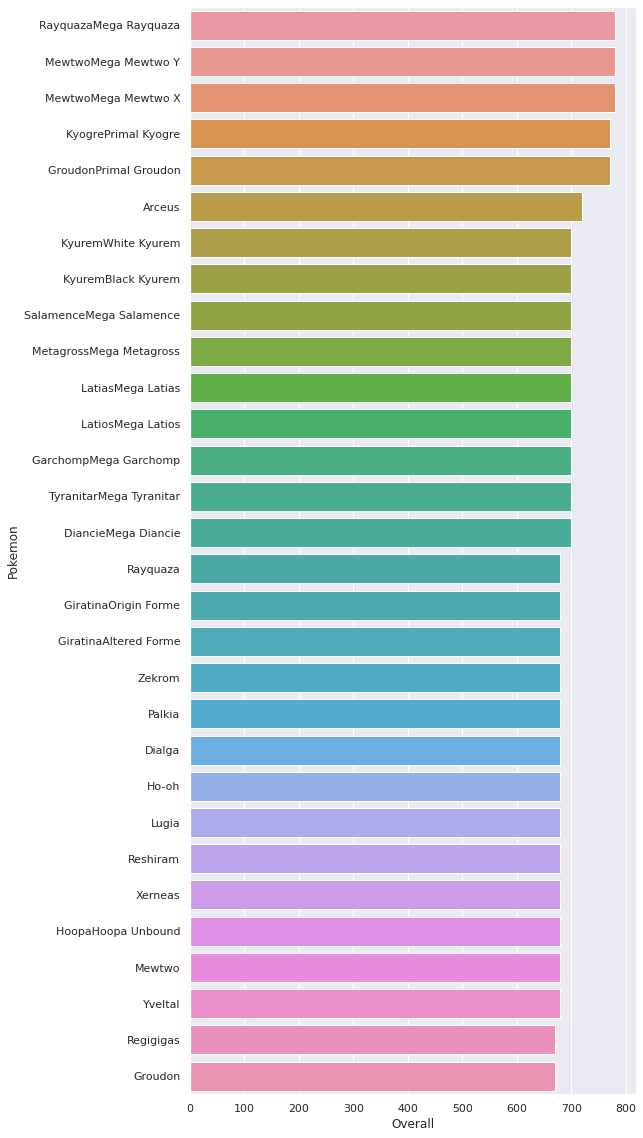

In [7]:
sns.set()
plt.figure(figsize=(8,20))
ax = sns.barplot(x = 'Total', y = 'Name', data = npoke_total.sort_values(by = 'Total', ascending = False).head(30))
ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
plt.show()

In [8]:
#Network analysis
g = nx.Graph()
g = nx.from_pandas_edgelist(data, source = 'Name', target = 'Type 1')
print(nx.info(g))

Graph with 818 nodes and 800 edges


In [9]:
data.shape

(800, 13)

In [10]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,0,309,39,52,43,60,50,65,1,False


In [11]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Graph with 818 nodes and 800 edges


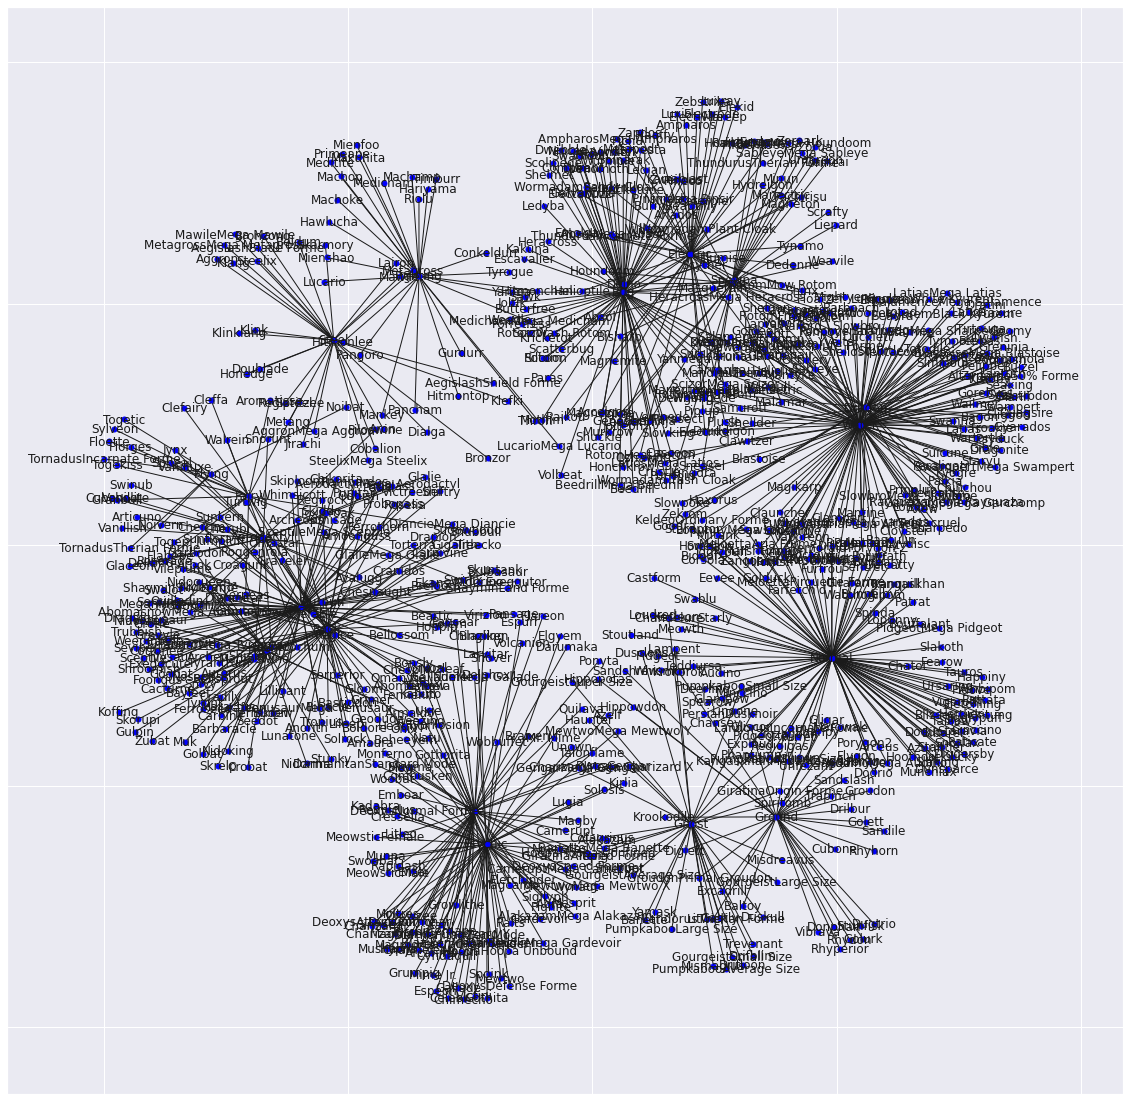

In [12]:
#Network analysis
g = nx.Graph()
g = nx.from_pandas_edgelist(data, source = 'Name', target = 'Type 1')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue')
plt.show()


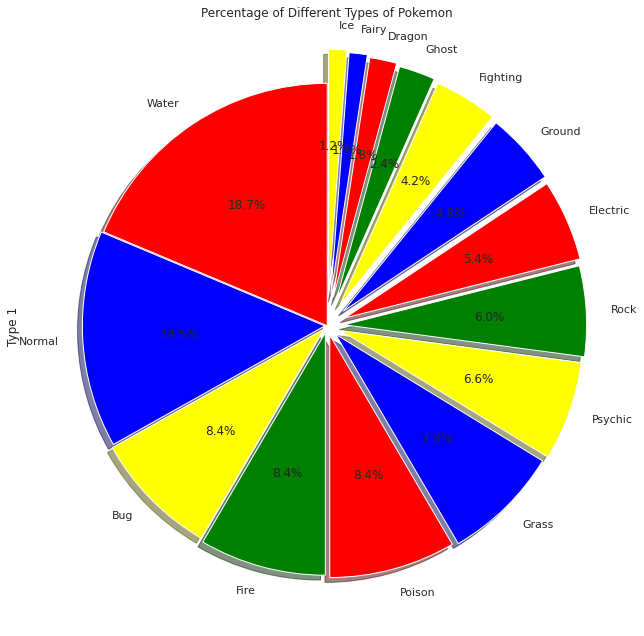

In [13]:
gen1 = data[data.Generation == 1]
types = gen1['Type 1']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'red',
    'blue',
    'yellow',
    'green'
]
types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Different Types of Pokemon",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(9,9)
)
plt.tight_layout()
plt.show()

Graph with 181 nodes and 166 edges


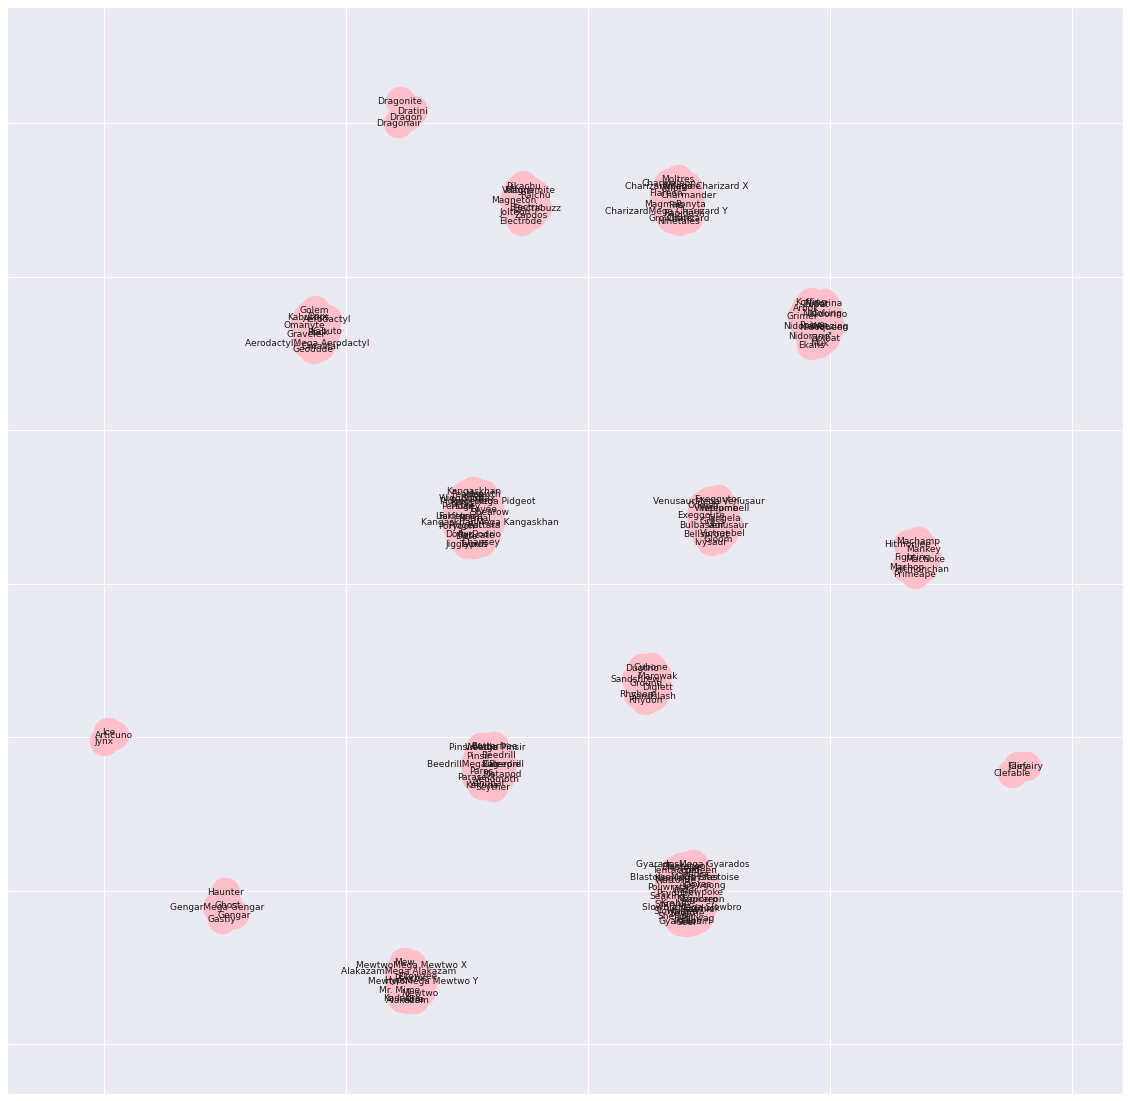

In [24]:
g = nx.from_pandas_edgelist(gen1,source='Name',target='Type 1')
print(nx.info(g))
nx.Graph()
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.0319)
nx.draw_networkx(g,pos,node_size=805, node_color='pink', font_size=9)
plt.show()